In [1]:
%cd ..

/workspaces/ml-zoomcamp


/home/codespace/.local/share/virtualenvs/ml-zoomcamp-b1mOyS8h/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the Dataset

In [ ]:
data_path = 'data/laptops.csv'
df = pd.read_csv(data_path)
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
selected_columns = ['ram', 'storage', 'screen', 'final_price']
df = df[selected_columns]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


# EDA

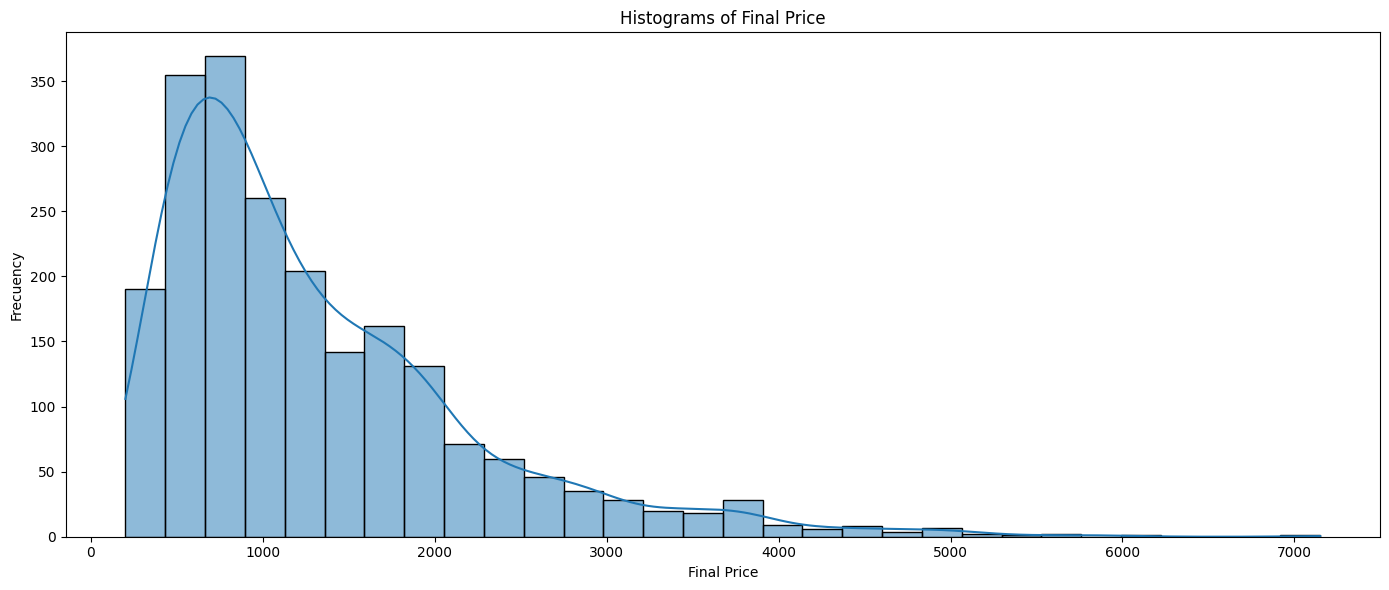

In [7]:


# Create a histogram of final_price
plt.figure(figsize=(14, 6))

sns.histplot(df['final_price'], bins=30, kde=True)
plt.title('Histograms of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()


# Question 1

In [8]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64


There's one column with missing values. What is it?

**solution**: `screen` has missing values

# Q2

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ram,2160.0,15.413889,9.867815,4.00,8.0000,16.000,16.00,128.00
storage,2160.0,596.294444,361.220506,0.00,256.0000,512.000,1000.00,4000.00
screen,2156.0,15.168112,1.203329,10.10,14.0000,15.600,15.60,18.00
final_price,2160.0,1312.638509,911.475417,201.05,661.0825,1031.945,1708.97,7150.47


What's the median (50% percentile) for variable 'ram'?

**solution**: 16

In [10]:
n= len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val, n_test, n_train)

432 432 1296


In [11]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [12]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [13]:
print(len(df_val), len(df_test), len(df_train))

432 432 1296


In [14]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [15]:
y_train = df_train.final_price.values
y_test = df_test.final_price.values
y_val =  df_val.final_price.values


In [16]:
df_train = df_train.drop(columns=['final_price'])
df_test = df_test.drop(columns=['final_price'])
df_val = df_val.drop(columns=['final_price'])

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [18]:
X_train = df_train.fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

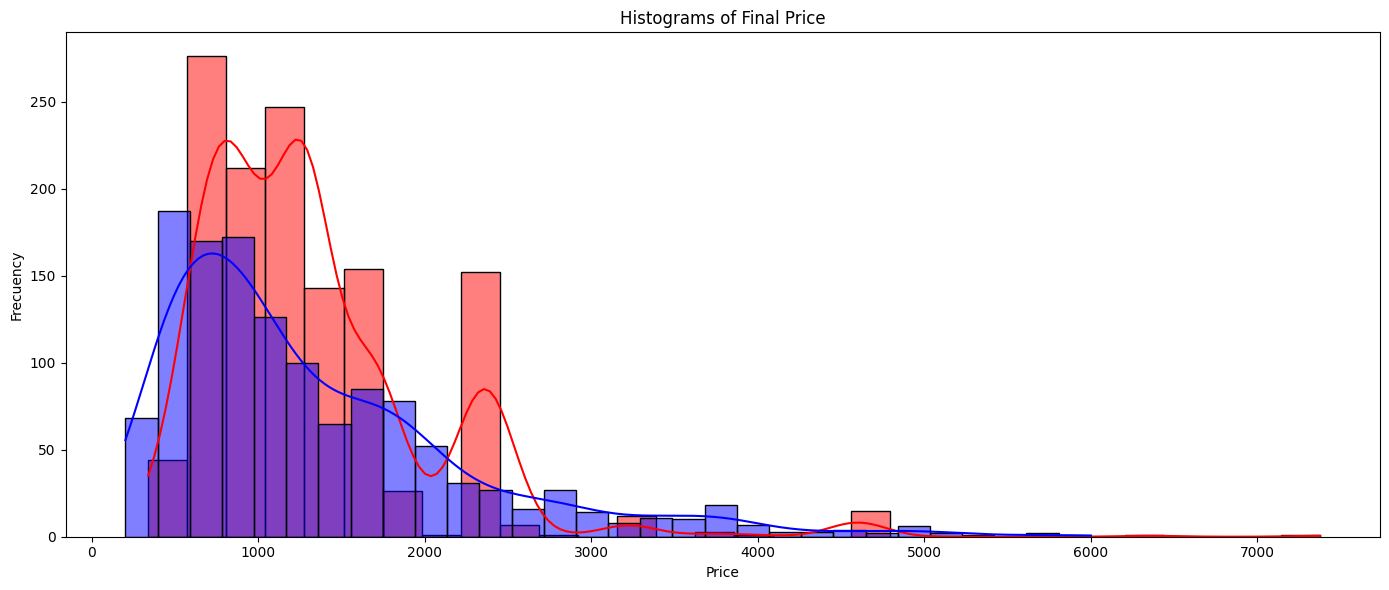

In [19]:
# Create a histogram of final_price
plt.figure(figsize=(14, 6))

sns.histplot(y_pred, bins=30, kde=True, color='red')
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title('Histograms of Final Price')
plt.xlabel('Price')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

In [20]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [21]:
rmse(y_train, y_pred)

np.float64(602.3920520606714)

In [22]:
def prepare_X(df, value):
    df = df.fillna(value)
    X = df.values
    return X

In [23]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(597.36)

In [24]:
x_mean_screen = df_train['screen'].mean()

X_train = prepare_X(df_train, x_mean_screen)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, x_mean_screen)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(600.27)

**solution**: The best option is fill the missing values with 0

# Question 4

In [25]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [26]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_list:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    print(round(rmse(y_val, y_pred), 2))

597.36
597.36
597.35
597.21
597.01
597.06
597.9


In [27]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for seed in seed_list:

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_test = df_test.final_price.values
    y_val =  df_val.final_price.values

    df_train = df_train.drop(columns=['final_price'])
    df_test = df_test.drop(columns=['final_price'])
    df_val = df_val.drop(columns=['final_price'])

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    rmse_val = round(rmse(y_val, y_pred), 3)
    print(rmse_val)
    rmse_list.append(rmse_val)

np.std(rmse_list)



565.452
636.799
588.956
597.815
571.963
573.238
647.344
550.44
587.334
576.102


np.float64(29.176576478572677)

**solution**: 29.176

# Question 6

In [28]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = pd.concat([df_train, df_val])

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_test = df_test.final_price.values

df_train = df_train.drop(columns=['final_price'])
df_test = df_test.drop(columns=['final_price'])

X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)

rmse_test = round(rmse(y_test, y_pred), 3)
print(rmse_test)

608.61


**solution**: The RMSE on the test dataset is 608.62